# 逻辑回归案例练习：不介绍

## 1. 引用

In [1]:
print(__doc__)
# Code source: Gael Varoquaux
# License: BSD 3 clause
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Automatically created module for IPython interactive environment


## 2.数据准备

In [3]:
# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)
X = X[:, np.newaxis]

In [4]:
X[:5],y[:5]

(array([[ 7.62115459],
        [ 1.19630112],
        [ 3.53380644],
        [ 9.25439181],
        [ 7.11829494]]), array([ 1.,  1.,  1.,  1.,  1.]))

## 2 模型训练

In [5]:
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### 2.1sigmoid函数

In [38]:
def model(x):
    return 1 / (1 + np.exp(-x))

## 3 测试数据

In [81]:
X_test = np.linspace(-5, 10, 300)
X_test[:5]

array([-5.        , -4.94983278, -4.89966555, -4.84949833, -4.7993311 ])

In [83]:
loss01 = model(X_test * clf.coef_ + clf.intercept_)
loss02=loss01.ravel()
loss01.shape,loss02.shape

((1, 300), (300,))

In [84]:
loss02[:5]

array([  1.92247900e-16,   2.71871556e-16,   3.84473083e-16,
         5.43710985e-16,   7.68900734e-16])

In [114]:
X.ravel()[:5]

array([ 7.62115459,  1.19630112,  3.53380644,  9.25439181,  7.11829494])

## 4 新模型

In [115]:
ols = linear_model.LinearRegression()
ols.fit(X, y)
ols.coef_,ols.intercept_,ols.

(array([ 0.12905048]), 0.37078983017505801)

## 3 画图

In [92]:
# and plot the result
plt.figure(1, figsize=(14, 8))
plt.clf()

In [108]:
plt.scatter(X.ravel(), y, color='black', zorder=20)

In [109]:
plt.plot(X_test, loss02, color='red', linewidth=3)

In [111]:
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=2)

In [112]:
plt.axhline(0.5, color='0.5')

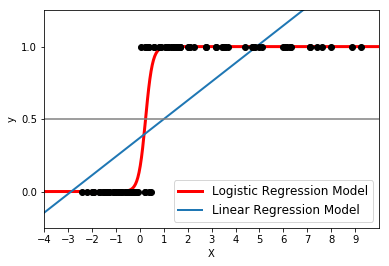

In [113]:
plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='larger')
plt.show()